# Exploratory Data Analysis on Sample Twitter Data

## Twitter objects and significant attributes:

- **Tweet objects**
    1. Id_str: unique  
    - Created_at: time of creation (can be inferred from file name) 
    - Text: 
    - Source:
    - Truncated: 
    - Timestamp_ms: to quantify rates of spread
    - In_reply_to_screen_name:
    - In_reply_to_status_id_str:  If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID, there is also a string version of this attribute
    - Coordinates/ geo (deprecated)/ place: the geographic location of this Tweet as reported by the user or client application. The place object is always present when a Tweet is geo-tagged, while the coordinates object is only present (non-null) when the Tweet is assigned an exact location.
    - Is_quote_status: Indicates whether this is a Quoted Tweet. 
    - Quoted_status_id: This field only surfaces when the Tweet is a quote Tweet. This field contains the integer value Tweet ID of the quoted Tweet.
    - Quoted_status: the Tweet object of the original Tweet that was quoted.
    - Retweeted_status: the original Tweet that was retweeted. Note that retweets of retweets do not show representations of the intermediary retweet, but only the original Tweet. 
    - Quote_count:   times this Tweet has been quoted by Twitter users. 
    - Reply_count: Number of times this Tweet has been replied to.
    - Retweet_count: Number of times this Tweet has been retweeted.
    - Favorite_count: how many times this Tweet has been liked by Twitter users. 
    - Favorited: whether this Tweet has been liked by the authenticating user
    - Retweeted: whether this Tweet has been Retweeted by the authenticating user. 
    - Possibly_sensitive: only surfaces when a Tweet contains a link. The meaning of the field doesn’t pertain to the Tweet content itself, but instead, it is an indicator that the URL contained in the Tweet may contain content or media identified as sensitive content.
    - Filter_level: the maximum value of the filter_level parameter which may be used and still stream this Tweet. So a value of medium will be streamed on none, low, and medium streams.
    - Lang: When present, indicates a BCP 47 language identifier corresponding to the machine-detected language of the Tweet text, or und if no language could be detected.
    - Entities (object)
    - User (object)


- **Entities objects** (Entities provide metadata and additional contextual information)
    1. Hashtags (object) [‘text’]
    - media :
    - Urls (object) [‘expanded_url’]  (without Enhanced URLs enrichment enabled)
    - Urls["unwound"]["url"] (with Enhanced URLs enrichment enabled)
    - User_mentions (object) [‘id’, ‘screen_name’]: other Twitter users mentioned in the text of the Tweet
    - Polls


- **User objects**
    1. Id: unique
    - screen_name 
    - location/ time zone: for geo location
    - created_at : time of creation
    - Protected: If you protect your Tweets, you’ll receive a request when new people want to follow you, which you can approve or deny.
    - Verified: accounts of public interest verified to be authentic by Twitter
    - Followers_count: number of followers
    - Friends_count:  number of users this account is following
    - Listed_count: number of public lists that this user is a member of
    - Favourites_count: number of Tweets this user has liked in the account’s lifetime
    - Statuses_count: number of Tweets (including retweets) issued by the user.
    - Contributors_enabled: Indicates that the user has an account with “contributor mode” enabled, allowing for Tweets issued by the user to be co-authored by another account. Rarely true (this is a legacy field) 


- **Extended Entity Objects**

additional media info: The additional_media_info will contain additional media info provided by the publisher, such as title, description and embeddable flag. Video content is made available only to Twitter official clients when embeddable=false. In this case, all video URLs provided in the payload will be Twitter-based, so the user can open the video in a Twitter owned property by clicking the link.


- **Geo Objects**
    1. coordinate object
    - place object: very specific , could be a bounding box, could be sent from that place or the twitt could be about that space
    
    Tweets associated with Places are not necessarily issued from that location but could also potentially be about that location.


## Nodes of networks
1. Tweets
2. Users
3. Tweets and Users (bipartite)

In [1]:
import json
import gzip 
import csv
import os
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
with open("data/clinton-sample.json", "rb") as f:
    sample = [json.loads(line) for line in f]

---
## Tweets

## Types of tweets:
1. Original: 
    - a tweet on its own 
    - not a retweet
    - not a quote
    - not a reply
- Retweet: 
    - no content on its own 
    - it is like ‘liking a tweet’
    - identified by ‘retweeted_status’ in tweet.keys()
- Quote:
    - a retweet with additional contents
    - identified by tweet['is_quote_status'] == True
- Reply:
    - a tweet on its own 
    - data only shows the tweet id that it is responding to, not the content
    - identified by tweet['in_reply_to_status_id'] != None

## Activities between tweets

![text](images/tweet activities.jpg)

1. quoting an original tweet
- retweeting an original tweet
- replying to an original tweet
- retweeting a quote
- retweeting a reply
- quoting a reply
- replying to a quote 
- quoting a quote
- replying to a reply

---

In [3]:
counts = {}

### Original

- if truncated: url in [extended_tweet]['entities']['urls']
- if special characteristic: url in ['unwound']['url']
- if normal: url in ['entities']['urls'][0]['expanded_url']
- if 'twitter.com/' in url: 

In [4]:
original = []
error = 0
for tweet in sample:
    try:
        if 'retweeted_status' not in tweet.keys() and \
        tweet['is_quote_status'] == False and \
        tweet['in_reply_to_status_id'] == None:
            original.append(tweet)
    except:
        error += 1
print(error,'error')    
original_count = len(original)
print(original_count)

counts['original'] = original_count

0 error
3828


In [5]:
original[33]

{'contributors': None,
 'truncated': False,
 'text': 'Assange descarta que Rusia haya ‘hackeado’ correos de Clinton – La Jornada https://t.co/gNmUbEZ1HO https://t.co/kyG7k87gWD',
 'is_quote_status': False,
 'in_reply_to_status_id': None,
 'id': 794350054446350339,
 'favorite_count': 0,
 'source': '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>',
 'retweeted': False,
 'coordinates': None,
 'timestamp_ms': '1478222785947',
 'entities': {'user_mentions': [],
  'symbols': [],
  'hashtags': [],
  'urls': [{'url': 'https://t.co/gNmUbEZ1HO',
    'indices': [75, 98],
    'expanded_url': 'http://ift.tt/2fkncXs',
    'display_url': 'ift.tt/2fkncXs'}],
  'media': [{'expanded_url': 'https://twitter.com/MexicoADiarioN/status/794350054446350339/photo/1',
    'display_url': 'pic.twitter.com/kyG7k87gWD',
    'url': 'https://t.co/kyG7k87gWD',
    'media_url_https': 'https://pbs.twimg.com/media/CwYZKgrXcAAiChM.jpg',
    'id_str': '794350052638683136',
    'sizes': {'large': {'h': 247, 'resize': 'fi

### 1. quoting an original

- url contained in ['quoted_status']

In [6]:
quote_original = []
error = 0
for tweet in sample:
    try:
        if tweet['is_quote_status'] == True and \
        'retweeted_status' not in tweet.keys() and \
        tweet['in_reply_to_status_id'] == None and \
        tweet['quoted_status']['is_quote_status'] == False and \
        'retweeted_status' not in tweet['quoted_status'].keys() and \
        tweet['quoted_status']['in_reply_to_status_id'] == None:
            quote_original.append(tweet)
    except:
        error += 1
print(error,'error')
quote_original_count = len(quote_original)
print(quote_original_count)

counts['quote_original'] = quote_original_count

0 error
1497


In [7]:
quote_original[0]

{'contributors': None,
 'truncated': False,
 'text': '#Standingrock #NoDAPL #ThursdayThoughts https://t.co/KapccD4Y3j',
 'is_quote_status': True,
 'in_reply_to_status_id': None,
 'id': 794223882593075202,
 'favorite_count': 0,
 'entities': {'user_mentions': [],
  'symbols': [],
  'hashtags': [{'indices': [0, 13], 'text': 'Standingrock'},
   {'indices': [14, 21], 'text': 'NoDAPL'},
   {'indices': [22, 39], 'text': 'ThursdayThoughts'}],
  'urls': [{'url': 'https://t.co/KapccD4Y3j',
    'indices': [40, 63],
    'expanded_url': 'https://twitter.com/GatorsEite23/status/794221645326123008',
    'display_url': 'twitter.com/GatorsEite23/s…'}]},
 'quoted_status_id': 794221645326123008,
 'retweeted': False,
 'coordinates': None,
 'timestamp_ms': '1478192704233',
 'quoted_status': {'contributors': None,
  'truncated': True,
  'text': 'Tday @POTUS rally for @HillaryClinton they BLOCKED our #NoDAPL signs by handing out Hill signs.Then intimidated us… https://t.co/T65TprDpqK',
  'is_quote_status': F

### 2. retweeting an original 

- url contained in ['retweeted_status']

In [8]:
retweet_original = []
error = 0
for tweet in sample:
    try:
        if tweet['is_quote_status'] == False and \
        'retweeted_status' in tweet.keys() and \
        tweet['in_reply_to_status_id'] == None and \
        tweet['retweeted_status']['is_quote_status'] == False and \
        'retweeted_status' not in tweet['retweeted_status'].keys() and \
        tweet['retweeted_status']['in_reply_to_status_id'] == None:
            retweet_original.append(tweet)
    except:
        error += 1
print(error,'error')
retweet_original_count = len(retweet_original)
print(retweet_original_count)

counts['retweet_original'] = retweet_original_count

0 error
14176


In [9]:
retweet_original[33]

{'contributors': None,
 'truncated': False,
 'text': 'RT @womanINtransit: #WikiLeaks: #Clinton Camp Rigging Primaries as Early as 2014 https://t.co/dlRfznREBm #BringBackBernie #DemExit #NotMeUS…',
 'is_quote_status': False,
 'in_reply_to_status_id': None,
 'id': 794256809104023552,
 'favorite_count': 0,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'retweeted': False,
 'coordinates': None,
 'timestamp_ms': '1478200554525',
 'entities': {'user_mentions': [{'id': 962643211,
    'indices': [3, 18],
    'id_str': '962643211',
    'screen_name': 'womanINtransit',
    'name': 'Merth'}],
  'symbols': [],
  'hashtags': [{'indices': [20, 30], 'text': 'WikiLeaks'},
   {'indices': [32, 40], 'text': 'Clinton'},
   {'indices': [105, 121], 'text': 'BringBackBernie'},
   {'indices': [122, 130], 'text': 'DemExit'},
   {'indices': [131, 139], 'text': 'NotMeUS'}],
  'urls': [{'url': 'https://t.co/dlRfznREBm',
    'indices': [81, 104],
    'expanded_url': 'http://obser

See if url within entities matches the one from the original tweet

In [11]:
error = 0
not_match = 0

for tweet in retweet_original:
    try:
        if tweet['entities']['urls'] != [] and tweet['retweeted_status']['entities']['urls'] != []:
            if tweet['retweeted_status']['entities']['urls'][0]['url'] != tweet['entities']['urls'][0]['url']:
                not_match +=1
    except: 
        error += 1

print(error,'error')
not_match

0 error


2993

> should look into ['retweeted_status'] for original urls

### 3. reply to an original

- url location like original

In [12]:
reply_original = []
error = 0
for tweet in sample:
    try:
        if tweet['is_quote_status'] == False and \
        'retweeted_status' not in tweet.keys() and \
        tweet['in_reply_to_status_id'] != None:
            reply_original.append(tweet)
    except:
        error += 1
print(error,'error')
reply_original_count = len(reply_original)
print(reply_original_count)

counts['reply_original'] = reply_original_count

0 error
1449


In [13]:
reply_original[984]

{'contributors': None,
 'truncated': False,
 'text': "@cspan @HillaryClinton here's a recap: \ndon't boo, vote\nCousin pookie\nC'mon Man\nTalking bidness\nThanks Obama\nRepublicans\nDonald Trump\nVote",
 'is_quote_status': False,
 'in_reply_to_status_id': 794263926938669058,
 'id': 794264649923493896,
 'favorite_count': 0,
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'retweeted': False,
 'coordinates': None,
 'timestamp_ms': '1478202423922',
 'entities': {'user_mentions': [{'id': 15675138,
    'indices': [0, 6],
    'id_str': '15675138',
    'screen_name': 'cspan',
    'name': 'CSPAN'},
   {'id': 1339835893,
    'indices': [7, 22],
    'id_str': '1339835893',
    'screen_name': 'HillaryClinton',
    'name': 'Hillary Clinton'}],
  'symbols': [],
  'hashtags': [],
  'urls': []},
 'in_reply_to_screen_name': 'cspan',
 'id_str': '794264649923493896',
 'display_text_range': [23, 138],
 'retweet_count': 0,
 'in_reply_to_user_id': 15675138

### 4. retweeting a quote

- 'retweeted_status' contains the quote
- 'quoted_status' contains the original (root)
- both places might contain urls

In [14]:
retweet_quote = []
error = 0
for tweet in sample:
    try:
        #tweet['is_quote_status'] == False and \
        if 'retweeted_status' in tweet.keys() and \
        tweet['in_reply_to_status_id'] == None and \
        tweet['retweeted_status']['is_quote_status'] == True and \
        'retweeted_status' not in tweet['retweeted_status'].keys() and \
        tweet['retweeted_status']['in_reply_to_status_id'] == None:
            retweet_quote.append(tweet)
    except:
        error += 1
print(error,'error')
retweet_quote_count = len(retweet_quote)
print(retweet_quote_count)

counts['retweet_quote'] = retweet_quote_count

0 error
2887


In [15]:
retweet_quote[33]

{'contributors': None,
 'truncated': False,
 'text': 'RT @DonaldJTrumpJr: Wow. Poor Bernie. He never had a chance running agains the most corrupt candidate in the history of the presidency.  ht…',
 'is_quote_status': True,
 'in_reply_to_status_id': None,
 'id': 794350251318525953,
 'favorite_count': 0,
 'entities': {'user_mentions': [{'id': 39344374,
    'indices': [3, 18],
    'id_str': '39344374',
    'screen_name': 'DonaldJTrumpJr',
    'name': 'Donald Trump Jr.'}],
  'symbols': [],
  'hashtags': [],
  'urls': []},
 'quoted_status_id': 794204382132891648,
 'retweeted': False,
 'coordinates': None,
 'timestamp_ms': '1478222832885',
 'quoted_status': {'contributors': None,
  'truncated': False,
  'text': 'WikiLeaks: Clinton Camp Rigging Primaries as Early as 2014 https://t.co/avdEzwAYRi',
  'is_quote_status': False,
  'in_reply_to_status_id': None,
  'id': 794204382132891648,
  'favorite_count': 235,
  'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'r

See if the url from quoted_status matches the one from original tweet

In [16]:
error = 0
not_match = 0

for tweet in retweet_quote:
    try:
        if tweet['retweeted_status']['quoted_status'] != tweet['quoted_status']:
            not_match += 1
    except: 
        error += 1

print(error,'error')
not_match

6 error


0

> so in most cases we can find the original tweet from tweet['quoted_status']

### 5. retweeting a reply

- url contained in ['retweeted_status']

In [17]:
retweet_reply = []
error = 0
for tweet in sample:
    try:
        if tweet['is_quote_status'] == False and \
        'retweeted_status' in tweet.keys() and \
        tweet['in_reply_to_status_id'] == None and \
        tweet['retweeted_status']['is_quote_status'] == False and \
        'retweeted_status' not in tweet['retweeted_status'].keys() and \
        tweet['retweeted_status']['in_reply_to_status_id'] != None:
            retweet_reply.append(tweet)
    except:
        error += 1
print(error,'error')
retweet_reply_count = len(retweet_reply)
print(retweet_reply_count)

counts['retweet_reply'] = retweet_reply_count

0 error
816


In [18]:
retweet_reply[33]

{'contributors': None,
 'truncated': False,
 'text': 'RT @debragg13: @0HOUR1___ @m1keymkv \nhttps://t.co/LC7BltoorM',
 'is_quote_status': False,
 'in_reply_to_status_id': None,
 'id': 794215295204331520,
 'favorite_count': 0,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'retweeted': False,
 'coordinates': None,
 'timestamp_ms': '1478190656840',
 'entities': {'user_mentions': [{'id': 3494008336,
    'indices': [3, 13],
    'id_str': '3494008336',
    'screen_name': 'debragg13',
    'name': 'Deplorable Dee Garza'},
   {'id': 59550291,
    'indices': [15, 25],
    'id_str': '59550291',
    'screen_name': '0HOUR1___',
    'name': '0'},
   {'id': 464343453,
    'indices': [26, 35],
    'id_str': '464343453',
    'screen_name': 'm1keymkv',
    'name': 'M1keyMkV'}],
  'symbols': [],
  'hashtags': [],
  'urls': [{'url': 'https://t.co/LC7BltoorM',
    'indices': [37, 60],
    'expanded_url': 'https://petitions.whitehouse.gov//petition/peter-k

See if url from entities matches the one from the origional reply tweet

In [19]:
error = 0
not_match = 0

for tweet in retweet_reply:
    try:
        if tweet['entities']['urls'] != [] and tweet['retweeted_status']['entities']['urls'] != []:
            if tweet['retweeted_status']['entities']['urls'][0]['url'] != tweet['entities']['urls'][0]['url']:
                not_match +=1
    except: 
        error += 1

print(error,'error')
not_match

0 error


87

> should look into ['retweeted_status'] for original urls

### 6. quoting a reply

- urls contained in ['quoted_status']

In [20]:
quote_reply = []
error = 0
for tweet in sample:
    try:
        if tweet['is_quote_status'] == True and \
        'retweeted_status' not in tweet.keys() and \
        tweet['in_reply_to_status_id'] == None and \
        tweet['quoted_status']['is_quote_status'] == False and \
        'retweeted_status' not in tweet['quoted_status'].keys() and \
        tweet['quoted_status']['in_reply_to_status_id'] != None:
            quote_reply.append(tweet)
    except:
        error += 1
print(error,'error')
quote_reply_count = len(quote_reply)
print(quote_reply_count)

counts['quote_reply'] = quote_reply_count

0 error
116


In [21]:
quote_reply[100]

{'contributors': None,
 'truncated': True,
 'text': 'Amen #WeThePeople #Freedom @realDonaldTrump are in*Mortal Combat*vs #Totalitarianism #CrookedHillary… https://t.co/IZ4uaflU8U',
 'is_quote_status': True,
 'in_reply_to_status_id': None,
 'id': 794197630335098882,
 'favorite_count': 0,
 'entities': {'user_mentions': [{'id': 25073877,
    'indices': [27, 43],
    'id_str': '25073877',
    'screen_name': 'realDonaldTrump',
    'name': 'Donald J. Trump'}],
  'symbols': [],
  'hashtags': [{'indices': [5, 17], 'text': 'WeThePeople'},
   {'indices': [18, 26], 'text': 'Freedom'},
   {'indices': [68, 84], 'text': 'Totalitarianism'},
   {'indices': [85, 100], 'text': 'CrookedHillary'}],
  'urls': [{'url': 'https://t.co/IZ4uaflU8U',
    'indices': [102, 125],
    'expanded_url': 'https://twitter.com/i/web/status/794197630335098882',
    'display_url': 'twitter.com/i/web/status/7…'}]},
 'quoted_status_id': 794178979523543040,
 'retweeted': False,
 'coordinates': None,
 'timestamp_ms': '147818644

In [22]:
error = 0
url = 0
url_within = 0

for tweet in quote_reply:
    try:
        if tweet['entities']['urls'] != []:
            url +=1
            if '//twitter.com' in tweet['entities']['urls'][0]['expanded_url']:
                url_within +=1
    except:
        error +=1

print(error, 'error')
print(url, 'with url')
print(url_within, 'url within twitter')

0 error
116 with url
114 url within twitter


> for quotes, urls within entities are links to the tweet that it quotes. So we need to look into ['quoted_status'] for urls

### 7. replying to a quote

- url contained in ['quoted_status']

In [23]:
reply_quote = []
error = 0
for tweet in sample:
    try:
        if tweet['is_quote_status'] == True and \
        'retweeted_status' not in tweet.keys() and \
        tweet['in_reply_to_status_id'] != None:
            reply_quote.append(tweet)
    except:
        error += 1
print(error,'error')
reply_quote_count = len(reply_quote)
print(reply_quote_count)

counts['reply_quote'] = reply_quote_count

0 error
49


In [24]:
reply_quote[33]

{'contributors': None,
 'truncated': False,
 'text': '@etuckerAP @AP If u fuck w/ King Julian #Assange, u fuck w/ #GENSANDS. https://t.co/7pDMdgERJ0 #MillionMaskMarch #Anonymous @WikiLeaks',
 'is_quote_status': True,
 'in_reply_to_status_id': 793853369475629056,
 'id': 794314221047713793,
 'favorite_count': 0,
 'entities': {'user_mentions': [{'id': 145313067,
    'indices': [0, 10],
    'id_str': '145313067',
    'screen_name': 'etuckerAP',
    'name': 'Eric Tucker'},
   {'id': 51241574,
    'indices': [11, 14],
    'id_str': '51241574',
    'screen_name': 'AP',
    'name': 'The Associated Press'},
   {'id': 16589206,
    'indices': [124, 134],
    'id_str': '16589206',
    'screen_name': 'wikileaks',
    'name': 'WikiLeaks'}],
  'symbols': [],
  'hashtags': [{'indices': [40, 48], 'text': 'Assange'},
   {'indices': [60, 69], 'text': 'GENSANDS'},
   {'indices': [95, 112], 'text': 'MillionMaskMarch'},
   {'indices': [113, 123], 'text': 'Anonymous'}],
  'urls': [{'url': 'https://t.co/7pDM

### 8. quoting a quote

- urls can be contained in either ['entities'] or ['quoted_status']

In [34]:
quote_quote = []
error = 0
for tweet in sample:
    try:
        if tweet['is_quote_status'] == True and \
        'retweeted_status' not in tweet.keys() and \
        tweet['in_reply_to_status_id'] == None and \
        tweet['quoted_status']['is_quote_status'] == True and \
        'retweeted_status' not in tweet['quoted_status'].keys() and \
        tweet['quoted_status']['in_reply_to_status_id'] != None:
            quote_quote.append(tweet)
    except:
        error += 1
print(error,'error')
quote_quote_count = len(quote_quote)
print(quote_quote_count)

counts['quote_quote'] = quote_quote_count

0 error
3


In [26]:
quote_quote[0]

{'contributors': None,
 'truncated': False,
 'text': "D'oh https://t.co/qNbYN7ijvb",
 'is_quote_status': True,
 'in_reply_to_status_id': None,
 'id': 794216759456911360,
 'favorite_count': 0,
 'entities': {'user_mentions': [],
  'symbols': [],
  'hashtags': [],
  'urls': [{'url': 'https://t.co/qNbYN7ijvb',
    'indices': [5, 28],
    'expanded_url': 'https://twitter.com/eacrants/status/794212268460408837',
    'display_url': 'twitter.com/eacrants/statu…'}]},
 'quoted_status_id': 794212268460408837,
 'retweeted': False,
 'coordinates': None,
 'timestamp_ms': '1478191005945',
 'quoted_status': {'contributors': None,
  'truncated': False,
  'text': '@MikeBaggerman https://t.co/acfQuRk25e',
  'is_quote_status': True,
  'in_reply_to_status_id': 794198686607769600,
  'id': 794212268460408837,
  'favorite_count': 0,
  'entities': {'user_mentions': [{'id': 71360474,
     'indices': [0, 14],
     'id_str': '71360474',
     'screen_name': 'MikeBaggerman',
     'name': 'Mike Baggerman'}],
   'sym

### 9. replying to a reply

Need to check the reply_status_id to see
- url most likely contained in ['entities']

### Counts

In [27]:
counts_df = pd.DataFrame.from_dict(counts, orient='index',columns=['counts'])
counts_df

,counts
original,3828
quote_original,1497
retweet_original,14176
reply_original,1449
retweet_quote,2887
retweet_reply,816
quote_reply,116
reply_quote,49
quote_quote,3


In [28]:
print('total number of samples: ', len(sample))
print('sum of different types of tweets categorized by this notebook:', sum(counts_df['counts']))
print('-->',len(sample)-sum(counts_df['counts']), 'are left out.')

total number of samples:  25000
sum of different types of tweets categorized by this notebook: 24821
--> 179 are left out.


> could be errors and mistakes in codes

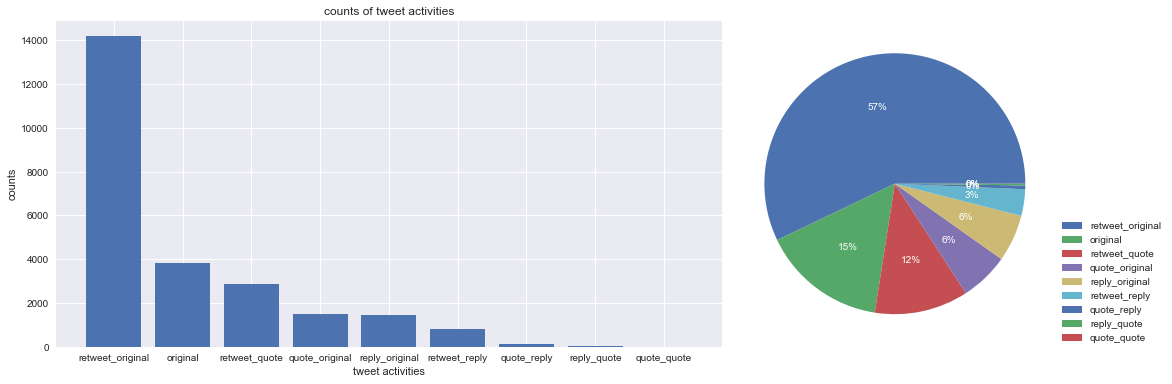

In [58]:
plt.figure(figsize = (21,6))

plt.subplot(1,2,1)
plt.title('counts of tweet activities')
df = counts_df.sort_values(by='counts',ascending = False)
plt.bar(df.index,df['counts'])
plt.xlabel('tweet activities')
plt.ylabel('counts')

plt.subplot(1,2,2)
plt.pie(df,autopct='%1.0f%%',textprops={'color': 'white'})
plt.subplots_adjust(wspace=-0.24)
plt.legend(df.index, loc=(1,0))

plt.show()

## Users

user --> user
1. follow

## Users and Tweets

users --> tweets
1. retweet
2. quote
3. reply
4. like

## Networks

In [ ]:
total_count = 0
url_count = 0 
url_outside_twitter_count = 0
retweet_counts = 0
quote_counts = 0 
reply_counts = 0

for tweet in sample:
    total_count += 1 
    if tweet['entities']['urls'] != []: url_count += 1
    if tweet['entities']['urls'] != [] and tweet['entities']['urls'][0]['expanded_url'] != None:
        if 'twitter.com' not in tweet['entities']['urls'][0]['expanded_url']: url_outside_twitter_count += 1
    if 'retweeted_status' in tweet.keys(): retweet_counts += 1
    if tweet['is_quote_status']== True: quote_counts += 1
    if tweet['in_reply_to_status_id'] != None: reply_counts += 1

print('total:',total_count)
print('total url:',url_count)
print('url outside of twitter:',url_outside_twitter_count)
print('retweet:', retweet_counts)
print('quote:', quote_counts)
print('reply:', reply_counts)